The current analysis will is based on the neurosynth dataset downloaded in December 2018.  
If you want to replicate this exact analysis, you can execute this notebook as it is.  
The data downloading cells are there for book keeping.  

In [1]:
cd -q ~/TaskSCCA_craddock/

In [2]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from nilearn.plotting import cm

import neurosynth
from neurosynth import Dataset
from neurosynth import decode

/home/hw1012/TaskSCCA_craddock/env/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [6]:
!wget -P data/external/neurosynth https://raw.githubusercontent.com/neurosynth/neurosynth-web/master/data/topics/keys/v4-topics-50.txt 
!mv data/external/neurosynth/v4-topics-50.txt data/external/neurosynth/v4-topics-50-key.txt 

!wget -P data/external/neurosynth https://raw.githubusercontent.com/neurosynth/neurosynth-web/master/data/topics/analyses/v4-topics-50.txt

neurosynth.dataset.download(path='data/external/neurosynth/.', unpack=True)

dataset = Dataset('data/external/neurosynth/database.txt')

dataset.save('data/external/neurosynth/dataset.pkl')  # load this in the future

--2018-12-21 12:15:14--  https://raw.githubusercontent.com/neurosynth/neurosynth-web/master/data/topics/keys/v4-topics-50.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44883 (44K) [text/plain]
Saving to: ‘data/external/neurosynth/v4-topics-50.txt’

v4-topics-50.txt    100%[===================>]  43.83K  --.-KB/s    in 0.04s   

2018-12-21 12:15:14 (1.11 MB/s) - ‘data/external/neurosynth/v4-topics-50.txt’ saved [44883/44883]

--2018-12-21 12:15:14--  https://raw.githubusercontent.com/neurosynth/neurosynth-web/master/data/topics/analyses/v4-topics-50.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12530

In [3]:
# Core functionality for managing and accessing data
dataset = Dataset.load('data/external/neurosynth/dataset.pkl')

/home/hw1012/TaskSCCA_craddock/env/lib/python3.7/site-packages/neurosynth/base/dataset.py:435: ResourceWarning: unclosed file <_io.BufferedReader name='data/external/neurosynth/dataset.pkl'>
  dataset = pickle.load(open(filename, 'rb'))


In [4]:
# Analysis with 24 terms:
features = pd.read_csv('data/external/neurosynth/v4-topics-50.txt', sep='\t', index_col=0)

topics_to_keep = [0,  1,  2,  3, 
                  5,  8,  11, 12,  
                  15, 17, 20, 22, 
                  23, 25, 29, 32, 
                  36, 40, 41, 42, 
                  44,47, 48, 49]

labels = ['motion perception', 'object recognition', 'cued attention', 'multisensory processing', 
          'facial recognition', 'inhibition error', 'motion and visuospatial memory', 'episodic memory',
          'eye movement', 'social cognition', 'reading', 'working memory', 
          'face/affective processing', 'feedback based learning', 'reward based decision making', 'auditory processing',
          'sentences comprehension', 'emotion regulation', 'visual attention', 'numerical cognition', 
          'verbal semantics', 'resolve conflicts', 'pain', 'sesnorimotor']

features = features.iloc[:, topics_to_keep]
features.columns = labels
dataset.add_features(features, append=False)

In [6]:
decoder = decode.Decoder(dataset)

/home/hw1012/TaskSCCA_craddock/env/lib/python3.7/site-packages/neurosynth/base/dataset.py:716: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  feature_weights = self.data.ix[:, features]
/home/hw1012/TaskSCCA_craddock/env/lib/python3.7/site-packages/pandas/core/indexing.py:890: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/home/hw1012/TaskSCCA_craddock/env/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/do

In [7]:
data = decoder.decode(['reports/figures/CCA/niftis/scca_mode1_mean.nii.gz',
                       'reports/figures/CCA/niftis/scca_mode2_mean.nii.gz',])

In [9]:
df = data.copy()
df.columns = ['Mode 1: average activation',
              'Mode 2: average activation',
             ]
# df.to_csv('data/processed/_neurosynth_decoding.csv')

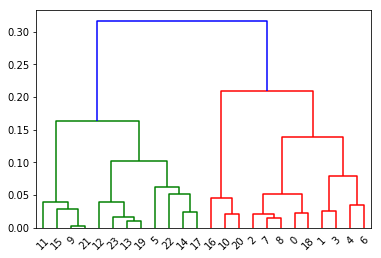

In [8]:
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(df.iloc[:, :2], method='ward'))  
new_order = [labels[i] for i in dend['leaves']]
plot_data = df.reindex(new_order)

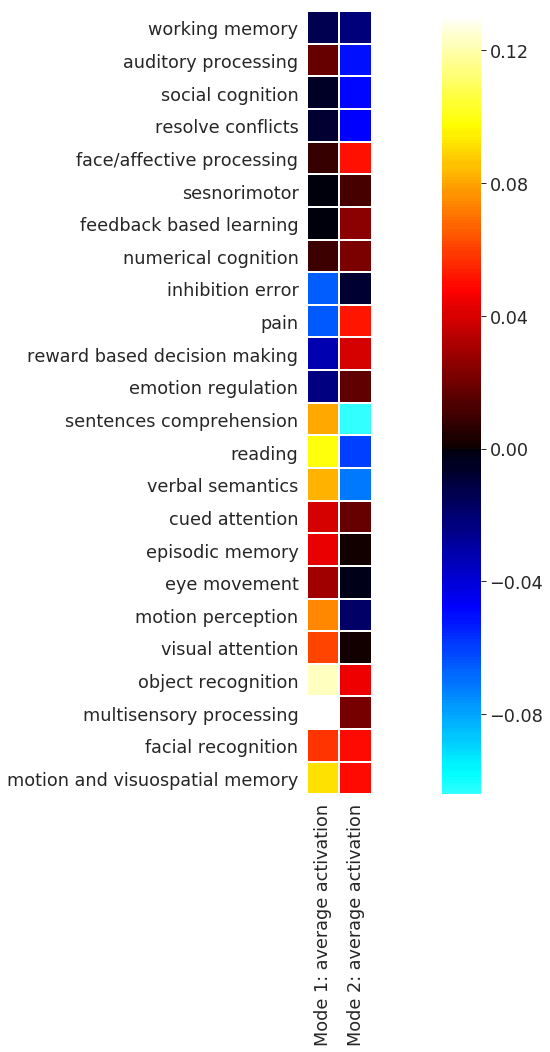

In [16]:
sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(20, 15), sharey=True)
cax = sns.heatmap(plot_data, linewidths=1, square=True, cmap=cm.cold_hot, center=0, robust=False, 
            ax=ax1)
f.tight_layout()

plt.plot()
plt.savefig('reports/figures/neurosynth/neurosynth.png', dpi=300, transparent=True)
plt.savefig('reports/figures/neurosynth/neurosynth.svg', dpi=300, transparent=True, format='svg')

In [11]:
import matplotlib.colors as mcolor
import matplotlib.colorbar as mcb
import matplotlib.cm as mcm

0.1317
-0.1317


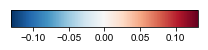

In [12]:
pv_in_hex= []
vmax = np.abs(df.values).max()
vmin = -vmax
for i in range(df.values.shape[1]):
    rescale = (df.values[:,i] - vmin) / (vmax - vmin)
    colors_hex = []
    for c in mcm.RdBu_r(rescale):
        colors_hex.append(mcolor.to_hex(c))
    pv_in_hex.append(colors_hex)
colors_hex = np.array(pv_in_hex).T
df_v_color = pd.DataFrame(colors_hex, columns=df.columns, index=df.index)
print(vmax)
print(vmin)
from src.visualize import set_text_size

set_text_size(10)

fig = plt.figure(figsize=(3, 0.8))
ax = fig.add_subplot(111)
cmap = mcm.RdBu_r
norm = mcolor.Normalize(vmin=vmin, vmax=vmax)
cb1 = mcb.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')
plt.tight_layout()
# plt.savefig('reports/figures/CCA/neurosynth/wordcloud_cb.png', transparent=True, dpi=300)

/home/hw1012/TaskSCCA_craddock/env/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


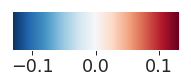

In [18]:
for n in df.columns.tolist():
    cur = pd.concat([df[n], df_v_color[n]], axis=1)
    cur.reset_index(level=0, inplace=True)
    cur.columns = ['word', 'ori_weight', 'color']
    cur['weight'] = np.round(np.abs(cur['ori_weight'] * 100))
    cur = cur[['weight', 'word', 'color']]
    cur.to_csv('reports/figures/neurosynth/{}_wordcloud_colors.csv'.format(n))  # pass to wordclouds.com